## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys, cv2, glob, os, time
import pandas as pd 
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten,Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
import numpy as np # linear algebra
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import librosa, librosa.display
import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [1]:
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import librosa, librosa.display
import os
import glob
import cv2
from sklearn.model_selection import train_test_split

# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd

import numpy as np # linear algebra
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import librosa, librosa.display
import sklearn

Bee
NoQueen


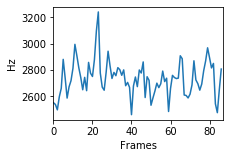

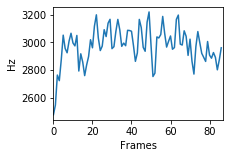

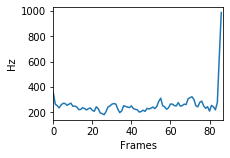

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (3,2)

x, fs = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\nobee\\CF003 - Active - Day - (214)-7-0.wav")
cent = librosa.feature.spectral_centroid(y=x, sr=fs)
plt.figure()
plt.plot(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xlabel("Frames")
plt.xlim([0, cent.shape[-1]])
plt.tight_layout(pad=0)
plt.savefig('SCNoBee.pdf', bbox_inches='tight')

plt.rcParams['figure.figsize'] = (3,2)
import matplotlib.pyplot as plt
print("Bee")
x, fs = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\bee\\CF003 - Active - Day - (214)-0-0.wav")
cent = librosa.feature.spectral_centroid(y=x, sr=fs)
plt.figure()
plt.plot(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xlabel("Frames")
plt.xlim([0, cent.shape[-1]])
plt.tight_layout(pad=0)
plt.savefig('SCBee.pdf', bbox_inches='tight')

plt.rcParams['figure.figsize'] = (3,2)
import matplotlib.pyplot as plt
print("NoQueen")
x, fs = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\noqueen\\CF001 - Missing Queen - Day --0-0.wav")
cent = librosa.feature.spectral_centroid(y=x, sr=fs)
plt.figure()
plt.plot(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xlabel("Frames")
plt.xlim([0, cent.shape[-1]])
plt.tight_layout(pad=0)
plt.savefig('SCNoQueen.pdf', bbox_inches='tight')

There is 0 csv file in the current version of the dataset:


In [7]:
def get_images(directory):
    centFeature = []
    Labels = [] 
    
    for labels in os.listdir(directory): 
        
        for image_file in os.listdir(directory+labels): 
            s, fs = librosa.load(directory+labels+r'/'+image_file) 
            cent = librosa.feature.spectral_centroid(y=s, sr=fs)
            centFeature.append(cent)
            Labels.append(labels)
    
    return shuffle(centFeature,Labels,random_state=817328462) #Shuffle the dataset you just prepared.



In [8]:
#Train data
centFeature, Labels = get_images("C:\\Users\\Sohail_Comp\\Downloads\\Bee or not bee\\nuhive_processed\\") #Extract the training images from the folders.

centFeature = np.array(centFeature) #converting the list of images to numpy array.
Labels = np.array(Labels)


In [9]:
from collections import Counter
Counter(Labels)

Counter({'bee': 5473, 'noqueen': 4861, 'nobee': 3458})

In [10]:
centFeature.shape

(13792, 1, 87)

In [12]:
n_samples = len(centFeature)
data_centFeature = centFeature.reshape(n_samples, -1)

In [85]:
data_centFeature.shape

(13792, 87)

In [38]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_centFeature, Labels, test_size=0.20, shuffle=True)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.52      0.62      0.56      1080
       nobee       0.40      0.28      0.33       699
     noqueen       0.54      0.55      0.54       980

    accuracy                           0.51      2759
   macro avg       0.49      0.48      0.48      2759
weighted avg       0.50      0.51      0.50      2759



In [14]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.41      0.85      0.55      1086
       nobee       0.49      0.14      0.22       683
     noqueen       0.45      0.15      0.22       990

    accuracy                           0.42      2759
   macro avg       0.45      0.38      0.33      2759
weighted avg       0.44      0.42      0.35      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [15]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.46103660746647335
              precision    recall  f1-score   support

         bee       0.63      0.45      0.52      1086
       nobee       0.32      0.10      0.15       683
     noqueen       0.40      0.73      0.52       990

    accuracy                           0.46      2759
   macro avg       0.45      0.42      0.40      2759
weighted avg       0.47      0.46      0.43      2759



In [16]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.69      0.55      0.61      1086
       nobee       0.55      0.27      0.36       683
     noqueen       0.52      0.82      0.63       990

    accuracy                           0.58      2759
   macro avg       0.58      0.54      0.54      2759
weighted avg       0.59      0.58      0.56      2759



In [25]:
data_centFeature.shape

(13792, 87)

In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)
# prepare transform on dataset
svd.fit(data_centFeature)
# apply transform to dataset
transformed = svd.transform(data_centFeature)
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed, Labels, test_size=0.20, shuffle=True)

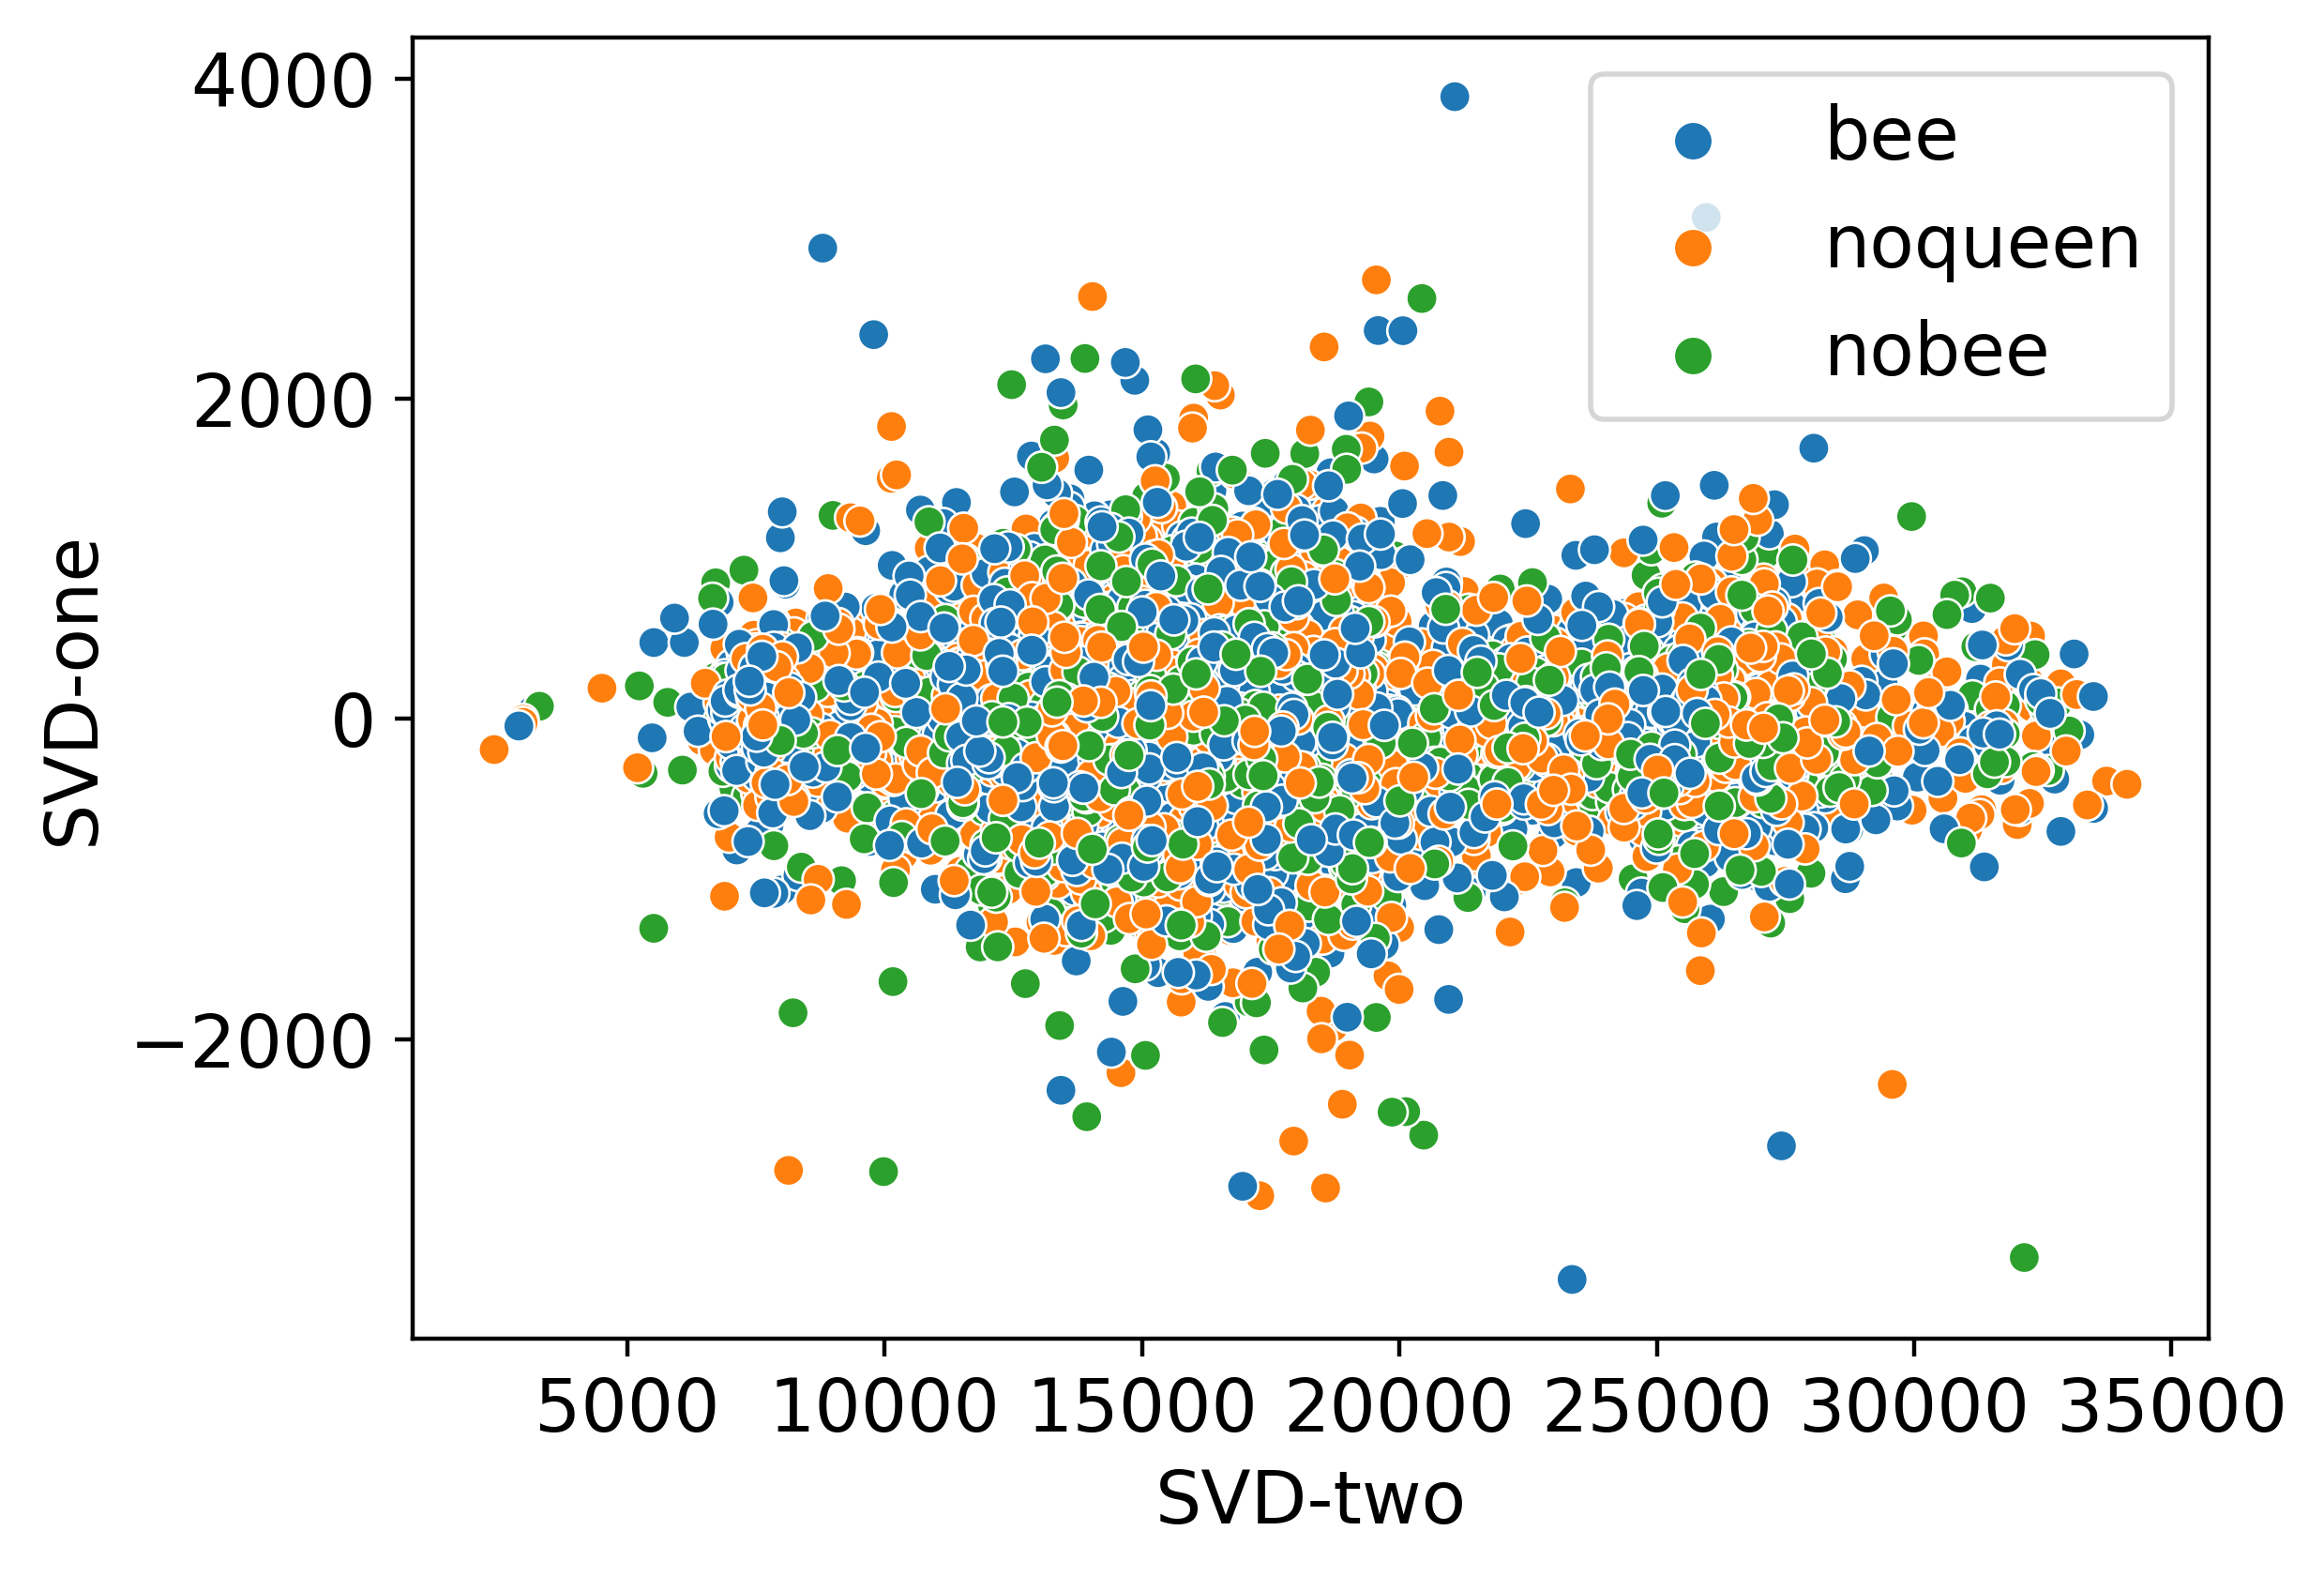

In [42]:
f = pd.DataFrame(data_centFeature)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

df1=f

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df1.shape[0])
svd = TruncatedSVD(n_components=2)
# prepare transform on dataset
svd.fit(df1)
# apply transform to dataset
pca_result = svd.transform(df1)

df1['pca-one'] = pca_result[:,0]
df1['pca-two'] = pca_result[:,1] 

plt.figure(figsize=(6,4),dpi=400)
plt.rcParams.update({'font.size': 14})
plt.ylabel('SVD-one', fontsize=14)
plt.xlabel('SVD-two', fontsize=14)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=Labels,
    data=df1.loc[rndperm,:],
    legend="full",
    alpha=1.0
)
plt.tight_layout(pad=0)
plt.savefig('centTruncatedSVDs.pdf', bbox_inches='tight')

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.55      0.65      0.60      1108
       nobee       0.42      0.31      0.36       665
     noqueen       0.55      0.53      0.54       986

    accuracy                           0.53      2759
   macro avg       0.51      0.50      0.50      2759
weighted avg       0.52      0.53      0.52      2759



In [31]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.42      0.87      0.57      1131
       nobee       0.51      0.12      0.19       688
     noqueen       0.42      0.13      0.20       940

    accuracy                           0.43      2759
   macro avg       0.45      0.37      0.32      2759
weighted avg       0.44      0.43      0.35      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [32]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.4755346139905763
              precision    recall  f1-score   support

         bee       0.89      0.33      0.49      1131
       nobee       0.00      0.00      0.00       688
     noqueen       0.40      0.99      0.57       940

    accuracy                           0.48      2759
   macro avg       0.43      0.44      0.35      2759
weighted avg       0.50      0.48      0.39      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [33]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.74      0.45      0.56      1131
       nobee       0.61      0.22      0.32       688
     noqueen       0.48      0.92      0.63       940

    accuracy                           0.55      2759
   macro avg       0.61      0.53      0.50      2759
weighted avg       0.62      0.55      0.52      2759



In [43]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
pca_result = pca.fit_transform(data_centFeature)
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_result, Labels, test_size=0.20, shuffle=True)

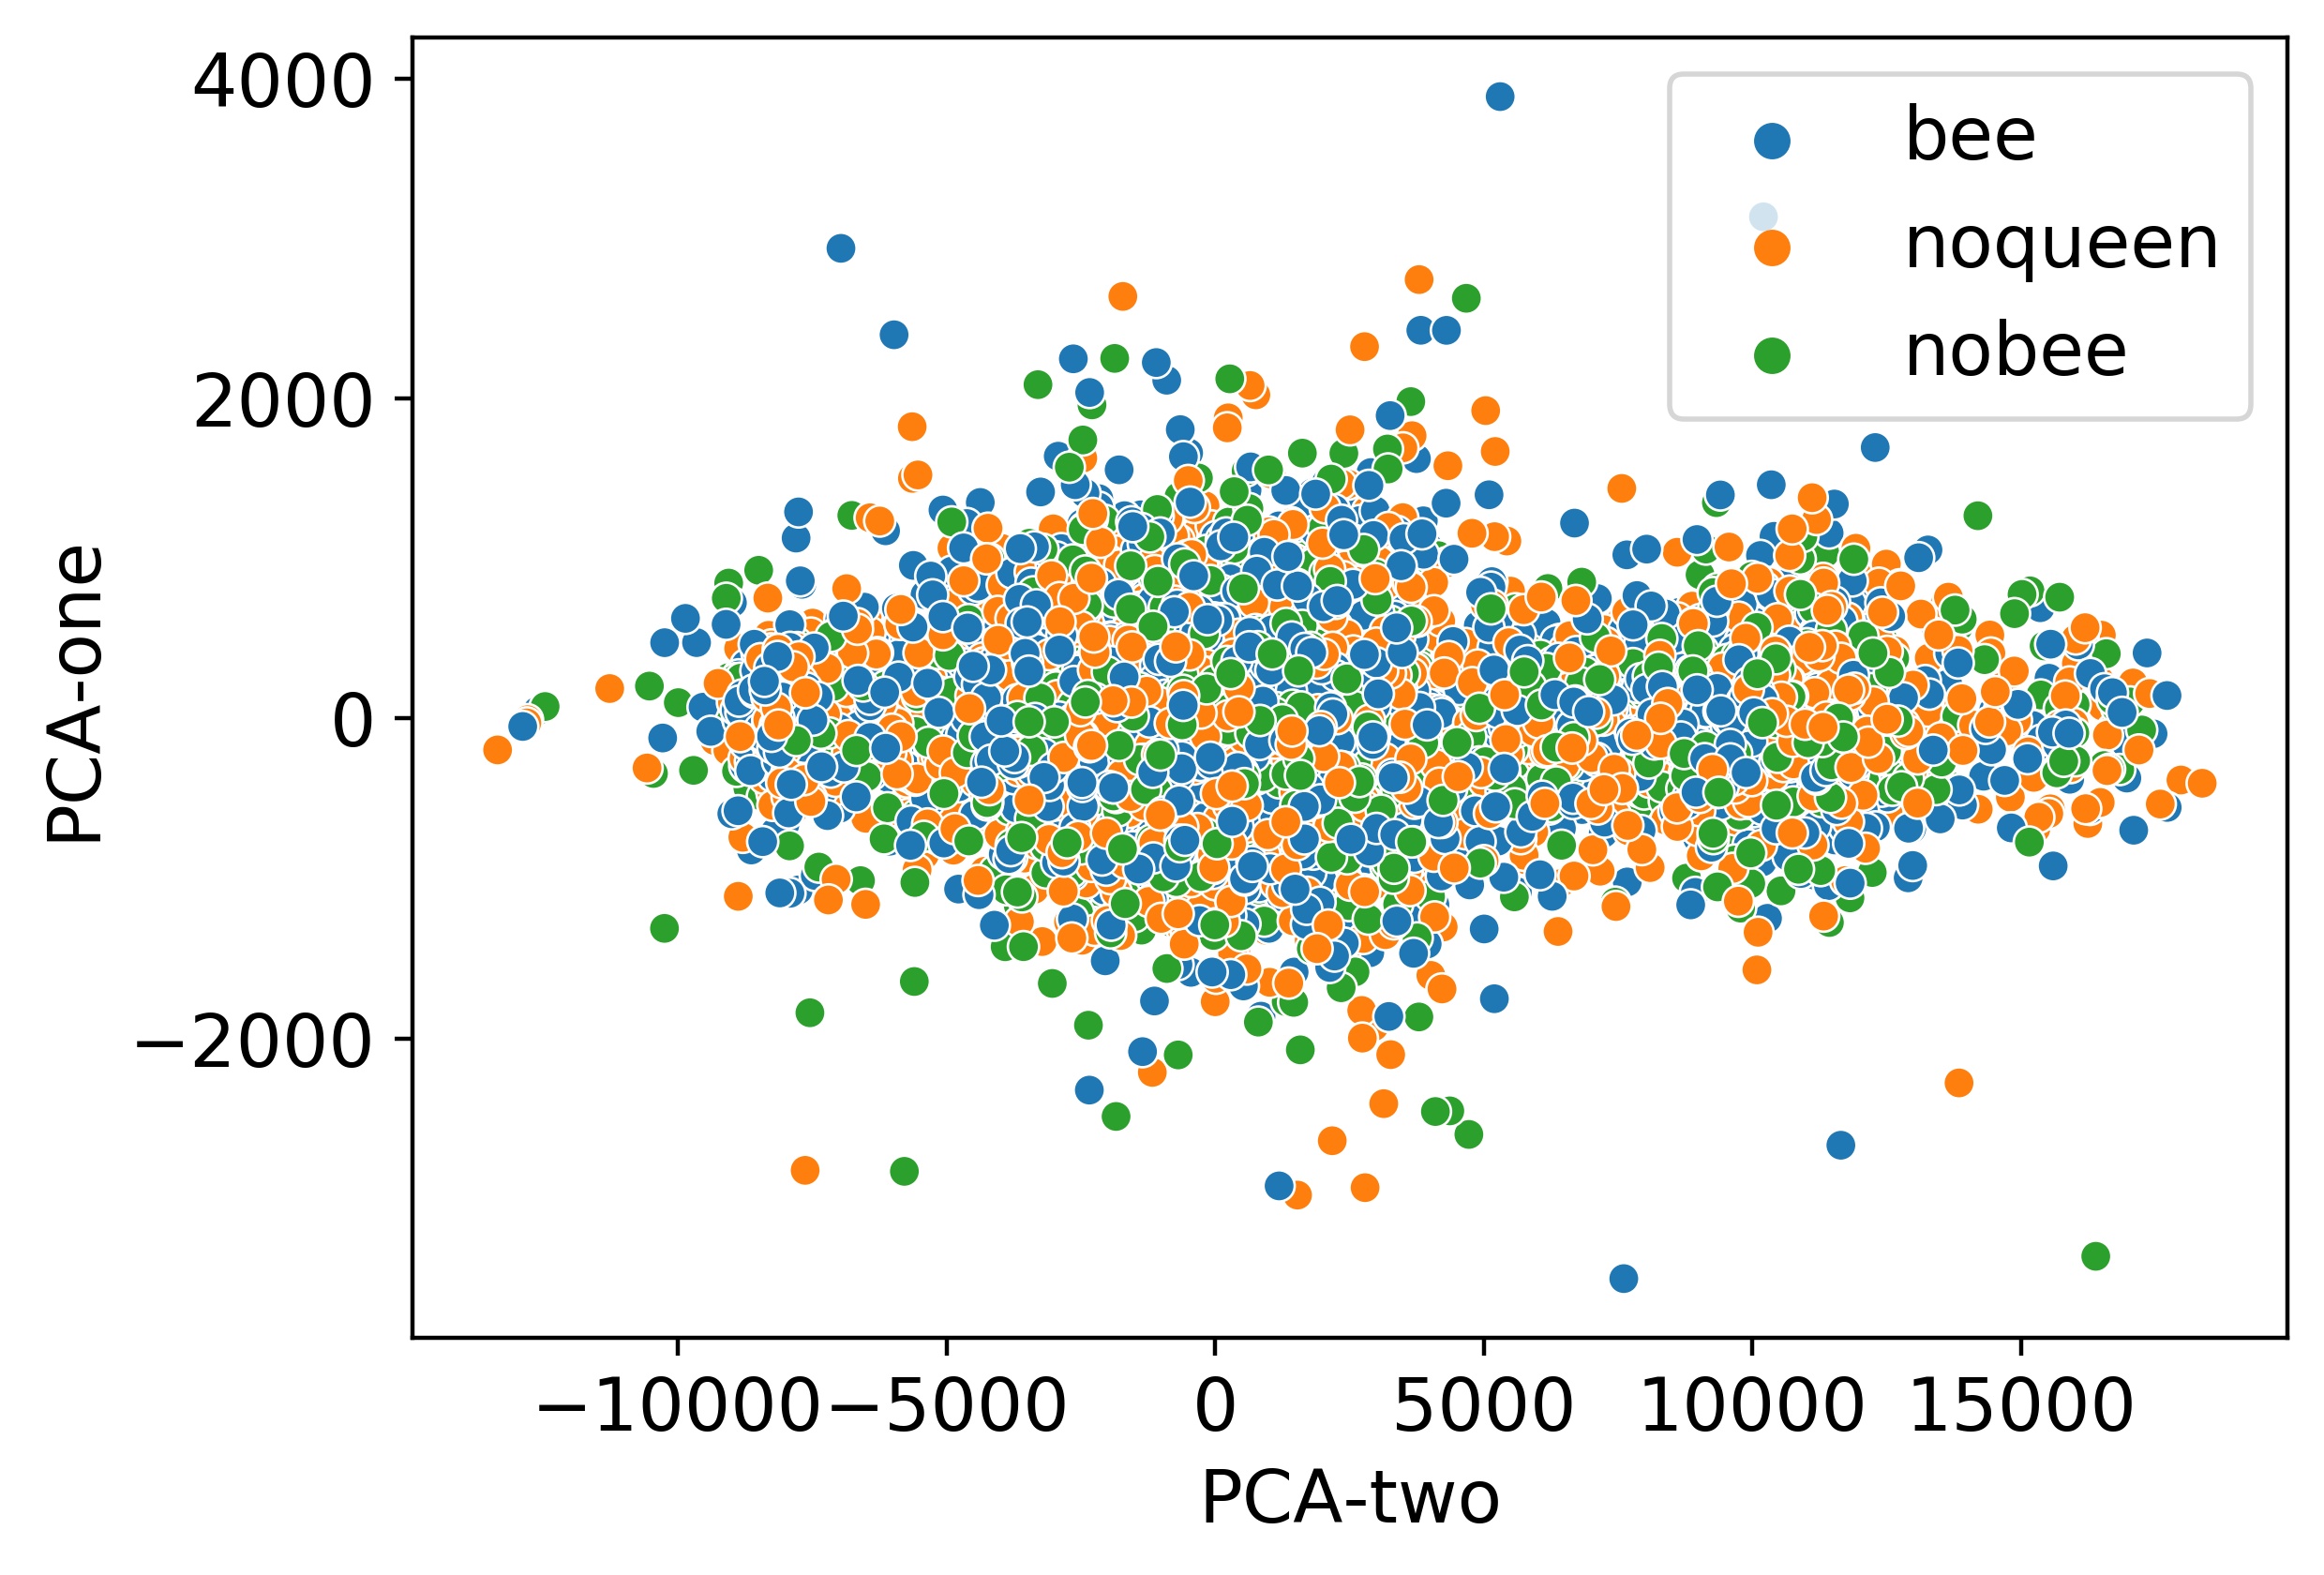

In [45]:
f = pd.DataFrame(data_centFeature)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

df1=f

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df1.shape[0])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1.values)
df1['pca-one'] = pca_result[:,0]
df1['pca-two'] = pca_result[:,1] 

plt.figure(figsize=(6,4),dpi=400)
plt.rcParams.update({'font.size': 14})
plt.ylabel('PCA-one', fontsize=14)
plt.xlabel('PCA-two', fontsize=14)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=Labels,
    data=df1.loc[rndperm,:],
    legend="full",
    alpha=1.0
)
plt.tight_layout(pad=0)
plt.savefig('centPCA.pdf', bbox_inches='tight')

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.52      0.65      0.58      1062
       nobee       0.45      0.32      0.38       681
     noqueen       0.55      0.51      0.53      1016

    accuracy                           0.52      2759
   macro avg       0.51      0.49      0.49      2759
weighted avg       0.51      0.52      0.51      2759



In [35]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.55      0.46      0.50      1122
       nobee       0.35      0.61      0.44       681
     noqueen       0.47      0.31      0.37       956

    accuracy                           0.44      2759
   macro avg       0.46      0.46      0.44      2759
weighted avg       0.47      0.44      0.44      2759



In [36]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.5106922798115259
              precision    recall  f1-score   support

         bee       0.80      0.31      0.45      1122
       nobee       0.66      0.16      0.25       681
     noqueen       0.44      1.00      0.61       956

    accuracy                           0.51      2759
   macro avg       0.63      0.49      0.44      2759
weighted avg       0.64      0.51      0.46      2759



In [37]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.74      0.43      0.55      1122
       nobee       0.63      0.23      0.34       681
     noqueen       0.49      0.94      0.64       956

    accuracy                           0.56      2759
   macro avg       0.62      0.54      0.51      2759
weighted avg       0.63      0.56      0.53      2759



In [65]:

# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Convert to categorical data by converting data to integers
X = data_centFeature.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 60)
X_kbest_features = chi2_features.fit_transform(X, Labels)
  
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, Labels, test_size=0.20, shuffle=True)

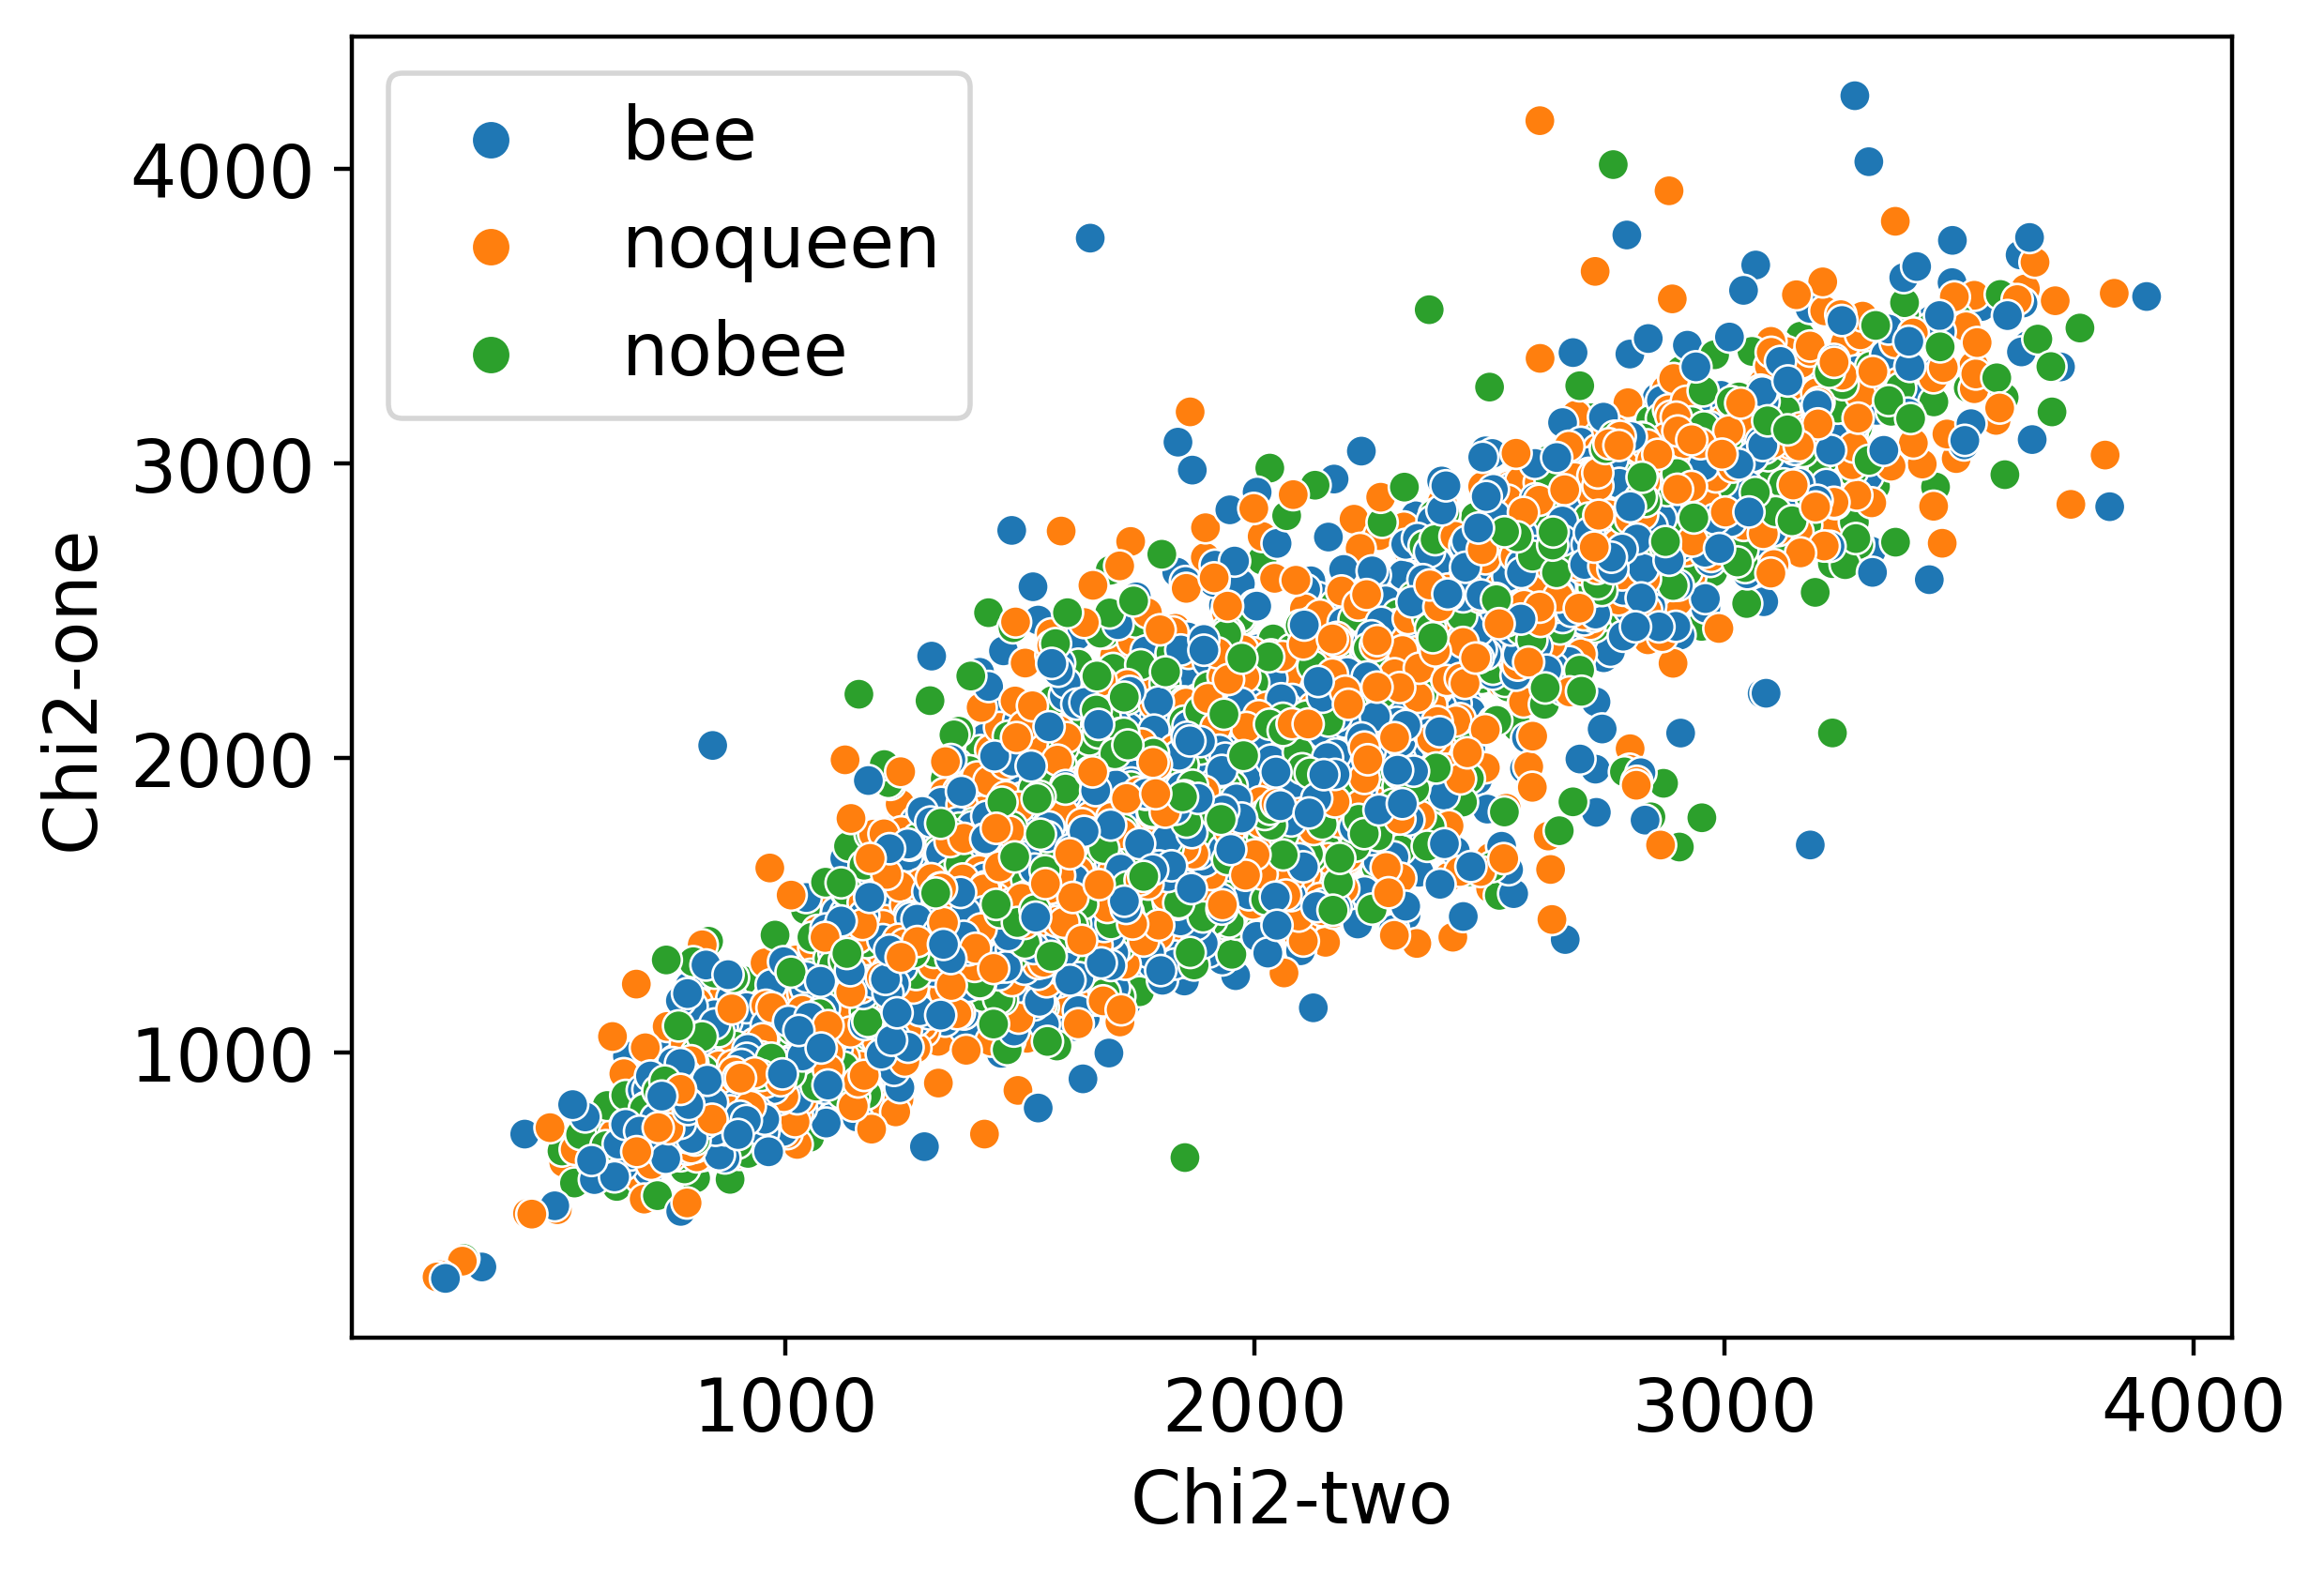

In [72]:
f = pd.DataFrame(data_centFeature)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

df1=f

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df1.shape[0])

chi2_features = SelectKBest(chi2, k = 2)
pca_result = chi2_features.fit_transform(df1, Labels)

df1['pca-one'] = pca_result[:,0]
df1['pca-two'] = pca_result[:,1] 

plt.figure(figsize=(6,4),dpi=400)
plt.rcParams.update({'font.size': 14})
plt.ylabel('Chi2-one', fontsize=14)
plt.xlabel('Chi2-two', fontsize=14)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=Labels,
    data=df1.loc[rndperm,:],
    legend="full",
    alpha=1.0
)
plt.tight_layout(pad=0)
plt.savefig('centChi2.pdf', bbox_inches='tight')

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.53      0.61      0.56      1084
       nobee       0.40      0.30      0.34       702
     noqueen       0.54      0.53      0.54       973

    accuracy                           0.50      2759
   macro avg       0.49      0.48      0.48      2759
weighted avg       0.50      0.50      0.50      2759



In [63]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=50.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.42      0.83      0.55      1106
       nobee       0.43      0.14      0.21       687
     noqueen       0.38      0.14      0.20       966

    accuracy                           0.41      2759
   macro avg       0.41      0.37      0.32      2759
weighted avg       0.41      0.41      0.34      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [28]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=4.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.47191011235955055
              precision    recall  f1-score   support

         bee       0.67      0.41      0.51      1085
       nobee       0.37      0.05      0.08       681
     noqueen       0.41      0.83      0.55       993

    accuracy                           0.47      2759
   macro avg       0.48      0.43      0.38      2759
weighted avg       0.50      0.47      0.42      2759



In [29]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.67      0.53      0.59      1085
       nobee       0.60      0.26      0.37       681
     noqueen       0.51      0.82      0.63       993

    accuracy                           0.57      2759
   macro avg       0.59      0.54      0.53      2759
weighted avg       0.59      0.57      0.55      2759



# hybrid

In [49]:
chi=pd.DataFrame(X_kbest_features)
svd=pd.DataFrame(transformed)
pca=pd.DataFrame(pca_result)
mfcc=pd.DataFrame(data_centFeature)
result = pd.concat([chi, svd,pca,mfcc], axis=1).reindex(chi.index)

In [50]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result, Labels, test_size=0.20, shuffle=True)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100) 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.65      0.56      0.60      1106
       nobee       0.64      0.21      0.31       687
     noqueen       0.51      0.83      0.63       966

    accuracy                           0.57      2759
   macro avg       0.60      0.53      0.52      2759
weighted avg       0.60      0.57      0.54      2759



In [52]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
#fit to the trainin data
a.fit(X_train,y_train)
yhat_classes = a.predict(X_test)
print(classification_report(y_test, yhat_classes))

              precision    recall  f1-score   support

         bee       0.42      0.83      0.55      1106
       nobee       0.43      0.14      0.21       687
     noqueen       0.38      0.14      0.20       966

    accuracy                           0.41      2759
   macro avg       0.41      0.37      0.32      2759
weighted avg       0.41      0.41      0.34      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [55]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=2.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVC
0.4835085175788329
              precision    recall  f1-score   support

         bee       0.87      0.34      0.49      1106
       nobee       0.00      0.00      0.00       687
     noqueen       0.41      0.99      0.58       966

    accuracy                           0.48      2759
   macro avg       0.43      0.44      0.36      2759
weighted avg       0.49      0.48      0.40      2759



C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [54]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

RF
              precision    recall  f1-score   support

         bee       0.68      0.55      0.61      1106
       nobee       0.57      0.28      0.38       687
     noqueen       0.51      0.81      0.63       966

    accuracy                           0.57      2759
   macro avg       0.59      0.55      0.54      2759
weighted avg       0.59      0.57      0.56      2759



In [67]:
X=result
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.56 +/- 0.01


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.42 +/- 0.01
svc 0.48 +/- 0.00
rf 0.57 +/- 0.00


In [68]:
X=X_kbest_features
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.56 +/- 0.01


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.40 +/- 0.00
svc 0.47 +/- 0.00
rf 0.57 +/- 0.00


In [69]:
X=pca_result
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.54 +/- 0.01
Lr 0.40 +/- 0.00
svc 0.48 +/- 0.00
rf 0.49 +/- 0.01


In [70]:
X=transformed
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.56 +/- 0.01


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.42 +/- 0.01
svc 0.48 +/- 0.00
rf 0.56 +/- 0.01


In [71]:
X=data_centFeature
y=Labels

from sklearn.model_selection import cross_val_score
clf =KNeighborsClassifier(n_neighbors=100) 
scores = cross_val_score(clf, X, y, cv=5)
print("KNN %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=5.0)
scores = cross_val_score(clf, X, y, cv=5)
print("Lr %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf =SVC(kernel='poly', C=2.0, random_state=500)
scores = cross_val_score(clf, X, y, cv=5)
print("svc %0.2f +/- %0.2f" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=200)
scores = cross_val_score(clf, X, y, cv=5)
print("rf %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN 0.56 +/- 0.01


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37

Lr 0.43 +/- 0.01
svc 0.47 +/- 0.00
rf 0.57 +/- 0.00


<Figure size 6000x15000 with 0 Axes>

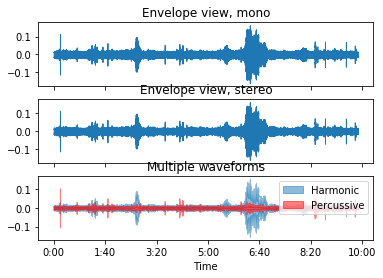

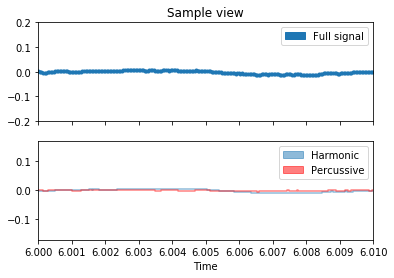

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
plt.figure(figsize=(20,50),dpi=300)
y, sr = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\archive (9)\\Hive1_31_05_2018_NO_QueenBee_H1_audio___15_00_00.wav")


fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()


librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()


fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

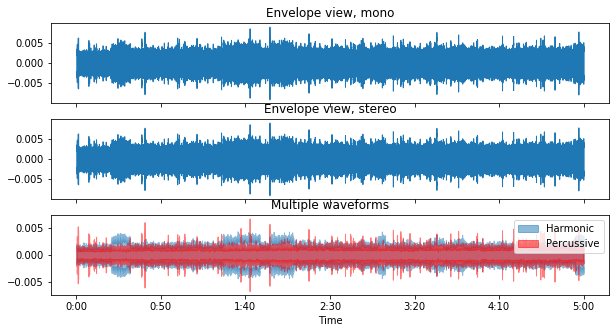

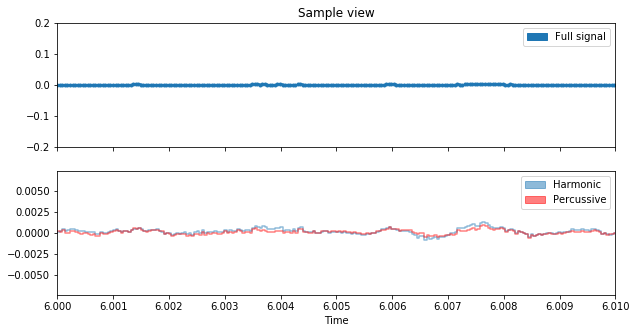

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn


y, sr = librosa.load("C:\\Users\\Sohail_Comp\\Downloads\\archive (9)\\CF003 - Active - Day - (215).wav")

fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()


librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()


fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Oh, no! There are no automatic insights available for the file types used in this dataset. As your Kaggle kerneler bot, I'll keep working to fine-tune my hyper-parameters. In the meantime, please feel free to try a different dataset.

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!